In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df = pd.read_csv("winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Quais as quantidades de cada tipo de vinho?

In [22]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## Quantos desvios padrões o vinho de 0.5 de açucar residual está da média?

In [23]:
std_distance = (abs(0.5 - df['residual sugar'].mean()) / df['residual sugar'].std())
std_distance

1.446035129020796

## Qual o intervalo de confiança dos vinhos de qualidade 5 em relação à quantidade de açucar residual?

In [24]:
# 1.96 pois este é o valor crítico encontrado na tabela z para 5%
# 100% - 5%/2 = 97.5%, esse valor na tabela Z é igual a 1.96

def confidence_interval(data):
    # 95% intervalo confiança
    mean=data.mean()
    sd=data.std()
    n=len(data)
    std_error=sd/np.sqrt(n)
    return (mean-(1.96*std_error)),(mean+(1.96*std_error))

In [25]:
confidence_interval(df[df['quality'] == 5]['residual sugar'])

(2.426727190893679, 2.630982060207643)

## Plote a distribuição do teor alcólico dos vinhos de acordo com a qualidade

<Axes: xlabel='quality', ylabel='alcohol'>

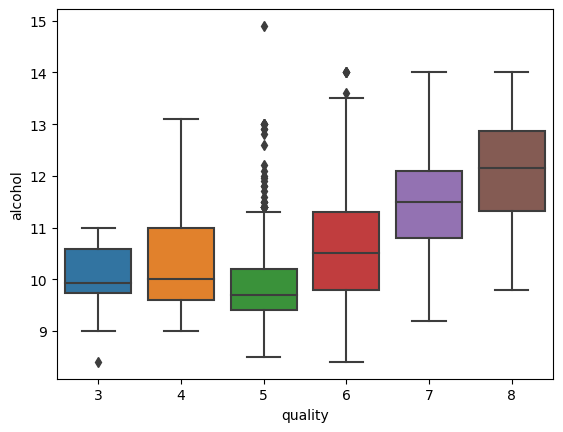

In [26]:
sns.boxplot(data=df, x='quality', y='alcohol')

## Houve um erro durante a produção, sendo que vinhos com a açucar residual maior que 10 foram afetados. Mostre quais foram os vinhos afetados

In [27]:
df[df['residual sugar'] > 10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
33,6.9,0.605,0.12,10.7,0.073,40.0,83.0,0.99930,3.45,0.52,9.4,6
324,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
325,10.0,0.490,0.20,11.0,0.071,13.0,50.0,1.00150,3.16,0.69,9.2,6
480,10.6,0.280,0.39,15.5,0.069,6.0,23.0,1.00260,3.12,0.66,9.2,5
1235,6.0,0.330,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.5,4
1244,5.9,0.290,0.25,13.4,0.067,72.0,160.0,0.99721,3.33,0.54,10.3,6
1434,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1435,10.2,0.540,0.37,15.4,0.214,55.0,95.0,1.00369,3.18,0.77,9.0,6
1474,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5
1476,9.9,0.500,0.50,13.8,0.205,48.0,82.0,1.00242,3.16,0.75,8.8,5


### Mostre uma lista com o id dos vinhos afetados

In [28]:
df[df['residual sugar'] > 10].index

Int64Index([33, 324, 325, 480, 1235, 1244, 1434, 1435, 1474, 1476, 1574], dtype='int64')

## Adicione um coluna para determinar o valor do vinho, considerando que o valor será:

Valor = Qualidade * teor alcóolico

In [29]:
df['valor'] = df['quality'] * df['alcohol']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,valor
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,47.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,49.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,49.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,58.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,52.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,67.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,66.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,51.0


## Quais são os vinhos com o maior preço de cada qualidade?

In [30]:
 df[df.groupby(['quality'])['valor'].transform(max) == df['valor']]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,valor
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,52.4
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,84.0
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,84.0
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6,84.0
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,112.0
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,74.5
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,98.0
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,33.0
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8,112.0
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,84.0


## Um vinho com o 'citric acid' igual a 0.45 tem a maior probabilidade de pertencer a qual qualidade?

In [31]:
qualidades = np.sort(df.quality.unique())

In [32]:
limiteInferior = []
limiteSuperior = []
for i in qualidades:
    inferior, superior = confidence_interval(df[df['quality'] == i]['citric acid'])
    print("Qualidade ",str(i)," Intervalo de confiança: ",(inferior, superior))
    limiteInferior.append(inferior)
    limiteSuperior.append(superior)

Qualidade  3  Intervalo de confiança:  (0.015637113540946046, 0.3263628864590539)
Qualidade  4  Intervalo de confiança:  (0.12002820062431155, 0.22827368616814123)
Qualidade  5  Intervalo de confiança:  (0.2301662318231855, 0.2572052806584591)
Qualidade  6  Intervalo de confiança:  (0.25868459509344455, 0.28896430772787207)
Qualidade  7  Intervalo de confiança:  (0.34816132933166444, 0.40219042946230543)
Qualidade  8  Intervalo de confiança:  (0.2989349953824657, 0.48328722683975645)


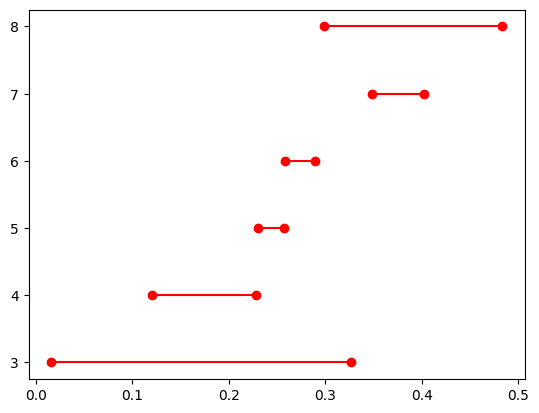

In [33]:
for lower,upper,y in zip(limiteInferior,limiteSuperior,range(len(qualidades))):
    plt.plot((lower,upper),(y,y),'ro-')
plt.yticks(range(len(qualidades)),qualidades)
plt.show()

In [34]:
x = 0.45
for i in qualidades:
    media = df[df['quality'] == i]['citric acid'].mean()
    desvioPadrao = df[df['quality'] == i]['citric acid'].std()
    N = df[df['quality'] == i].size
    std_error = desvioPadrao / np.sqrt(N)
    resultado = (x-media) / std_error

    print("Qualidade ",str(i)," Numeros de erros padrões de distância: " ,resultado,std_error)

Qualidade  3  Numeros de erros padrões de distância:  12.690673457552945 0.02198464887881511
Qualidade  4  Numeros de erros padrões de distância:  36.017988357441276 0.007658646947915499
Qualidade  5  Numeros de erros padrões de distância:  107.84389014256075 0.0019130823590140086
Qualidade  6  Numeros de erros padrões de distância:  82.23403992753263 0.002142367670913328
Qualidade  7  Numeros de erros padrões de distância:  19.573641520356894 0.0038226980158595843
Qualidade  8  Numeros de erros padrões de distância:  4.514843539028542 0.013043395276009952


In [35]:
import scipy.stats as st


def analise_amostra(populacao, valor):
    print("\t\t\t Amostra "+str(valor))
    
    media_populacao=populacao.mean()
    erro_padrao=populacao.sem() 
    
    z_score = abs(valor - media_populacao) / erro_padrao
    valor_p = 2*st.norm.sf(abs(z_score))
    
    print("Média População: %.3f" % (media_populacao))
    print("Valor da Amostra: ",(valor))
    print("Erro Padrão:"+str(erro_padrao))
    print("A diferença entre a média da amostra e da população é de %.3f erros padrões." % (z_score))
    print("Valor-p: %.10f" % (valor_p))
    
    if(valor_p < 0.05):
        print("Provavelmente a Amostra NÃO veio da População.")
    else:
        print("Provavelmente a Amostra VEIO da População.")
        
    print("\n\n")

for i in qualidades:
    print("\t\t\t Qualidade  "+str(i))
    analise_amostra(df[df['quality'] == i]['citric acid'],x)  

			 Qualidade  3
			 Amostra 0.45
Média População: 0.171
Valor da Amostra:  0.45
Erro Padrão:0.07926677880563977
A diferença entre a média da amostra e da população é de 3.520 erros padrões.
Valor-p: 0.0004319382
Provavelmente a Amostra NÃO veio da População.



			 Qualidade  4
			 Amostra 0.45
Média População: 0.174
Valor da Amostra:  0.45
Erro Padrão:0.027613644271385122
A diferença entre a média da amostra e da população é de 9.990 erros padrões.
Valor-p: 0.0000000000
Provavelmente a Amostra NÃO veio da População.



			 Qualidade  5
			 Amostra 0.45
Média População: 0.244
Valor da Amostra:  0.45
Erro Padrão:0.0068977165396106165
A diferença entre a média da amostra e da população é de 29.911 erros padrões.
Valor-p: 0.0000000000
Provavelmente a Amostra NÃO veio da População.



			 Qualidade  6
			 Amostra 0.45
Média População: 0.274
Valor da Amostra:  0.45
Erro Padrão:0.007724416488374366
A diferença entre a média da amostra e da população é de 22.808 erros padrões.
Valor-p: 0.000

##  Fazer um gráfico de barra da média de "alcohol" por "quality"

<Axes: xlabel='quality'>

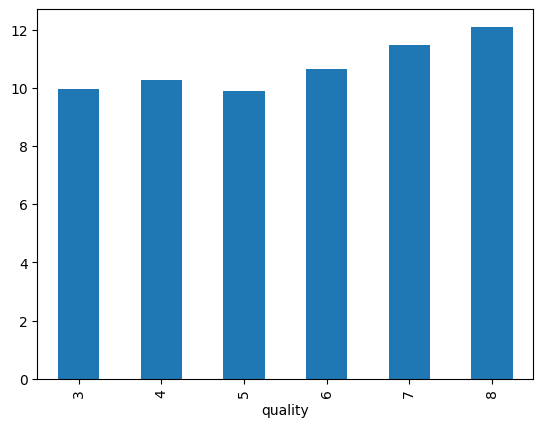

In [36]:
df.groupby(['quality'])['alcohol'].mean().plot.bar()

<Axes: xlabel='quality'>

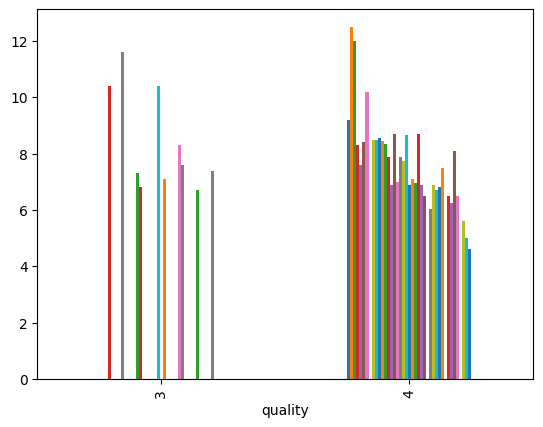

In [41]:
df[(df['quality'] == 3) | (df['quality'] == 4)].groupby(['quality','pH'])['fixed acidity'].mean().unstack().plot.bar(legend=False)

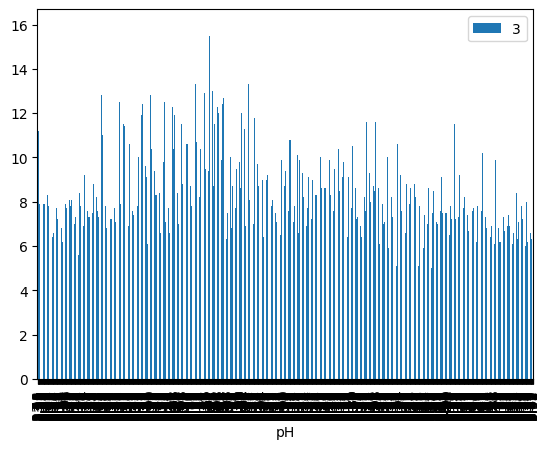

In [45]:
aux = df[['quality','pH', 'fixed acidity']].plot(x="pH", y="fixed acidity", kind="bar")
aux.legend(df[['quality','pH', 'fixed acidity']].groupby('quality').groups.keys())
plt.show()


<Axes: xlabel='pH'>

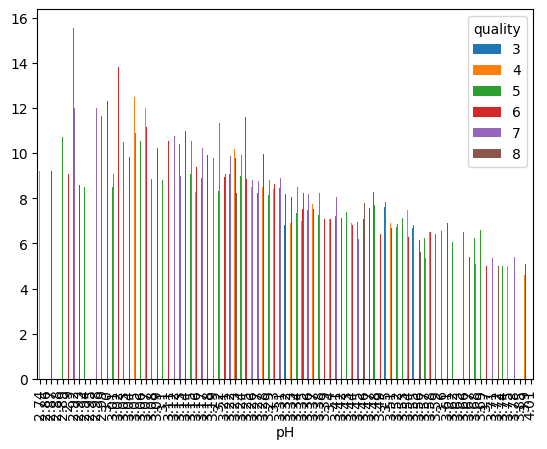

In [50]:
df.pivot_table(index='pH', columns='quality', values='fixed acidity', aggfunc='mean').plot(kind='bar')